In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [2]:
# 1. Chargement des données (Classification)

try:
    X_class = pd.read_csv('../data/processed/X_classification.csv')
    y_class = pd.read_csv('../data/processed/y_classification.csv')
    
    print("Données chargées avec succès.")
    print(f"  Classification: {X_class.shape}")

except FileNotFoundError:
    print("Erreur: Fichiers non trouvés. Vérifiez le chemin '../data/processed/'.")
    exit()

Données chargées avec succès.
  Classification: (56172, 42)


In [5]:
# PARTIE 1: BASELINES (CLASSIFICATION)
# Objectif: Établir les performances de base

print("PARTIE 1: BASELINES\n")

# Split train/test (80% train, 20% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Raveler y pour sklearn
y_train_class = y_train_class.values.ravel()
y_test_class = y_test_class.values.ravel()

# Normalisation
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# A. Régression Logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_class_scaled, y_train_class)
y_pred_log = log_reg.predict(X_test_class_scaled)
acc_log = accuracy_score(y_test_class, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")

# B. Dummy Classifier (Baseline)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_class_scaled, y_train_class)
y_pred_dummy = dummy_clf.predict(X_test_class_scaled)
acc_dummy = accuracy_score(y_test_class, y_pred_dummy)
print(f"Dummy Classifier Accuracy:    {acc_dummy:.4f}")

PARTIE 1: BASELINES

Logistic Regression Accuracy: 0.6131
Dummy Classifier Accuracy:    0.5062


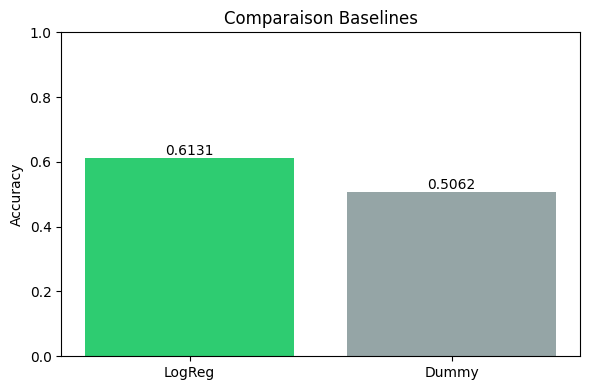

In [4]:
# Visualisation Rapide
models = ['LogReg', 'Dummy']
accuracies = [acc_log, acc_dummy]
colors = ['#2ecc71', '#95a5a6']

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0.0, 1.0)
plt.title('Comparaison Baselines')
plt.ylabel('Accuracy')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()